In [1]:
import pandas as pd
import numpy as np

In [2]:
def show_df_info(df):
    print(df.info())
    print('####### Repeat ####### \n', df.duplicated().any())
    print('####### Count ####### \n', df.nunique())
#     print('####### Describe ####### \n', df.describe())
    print('####### Example ####### \n',df.head())

In [3]:
def label_statics(label_df, label_list):
    print("####### nCount #######")
    for label in label_list:
        print(label_df[label].value_counts())
    print("####### nPercent #######")
    for label in label_list:
        print(label_df[label].value_counts()/label_df.shape[0])

# Load

## label

### label analysis

In [4]:
label = pd.read_csv('./user_profile.txt', sep='\t', usecols=[0,1,2,3], header=None, names=['uid', 'year', 'gender', 'tweet'])
label.dropna(inplace=True)
show_df_info(label)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2320895 entries, 0 to 2320894
Data columns (total 4 columns):
uid       int64
year      object
gender    int64
tweet     int64
dtypes: int64(3), object(1)
memory usage: 88.5+ MB
None
####### Repeat ####### 
 False
####### Count ####### 
 uid       2320895
year          163
gender          4
tweet        3633
dtype: int64
####### Example ####### 
       uid  year  gender  tweet
0  100044  1899       1      5
1  100054  1987       2      6
2  100065  1989       1     57
3  100080  1986       1     31
4  100086  1986       1    129


In [5]:
label = label[label['gender'].isin(['1', '2'])] 
year = list(map(str, [x for x in range(1912,2012)]))
label = label[label['year'].isin(year)]
show_df_info(label)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216040 entries, 1 to 2320894
Data columns (total 4 columns):
uid       int64
year      object
gender    int64
tweet     int64
dtypes: int64(3), object(1)
memory usage: 84.5+ MB
None
####### Repeat ####### 
 False
####### Count ####### 
 uid       2216040
year          100
gender          2
tweet        3585
dtype: int64
####### Example ####### 
       uid  year  gender  tweet
1  100054  1987       2      6
2  100065  1989       1     57
3  100080  1986       1     31
4  100086  1986       1    129
5  100097  1981       1     75


In [6]:
label[['year']] = pd.to_numeric(label['year'])
label[['year']] = 2012 - label[['year']]
label.rename(columns={'year':'age'}, inplace=True)
show_df_info(label)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216040 entries, 1 to 2320894
Data columns (total 4 columns):
uid       int64
age       int64
gender    int64
tweet     int64
dtypes: int64(4)
memory usage: 84.5 MB
None
####### Repeat ####### 
 False
####### Count ####### 
 uid       2216040
age           100
gender          2
tweet        3585
dtype: int64
####### Example ####### 
       uid  age  gender  tweet
1  100054   25       2      6
2  100065   23       1     57
3  100080   26       1     31
4  100086   26       1    129
5  100097   31       1     75


### label filter

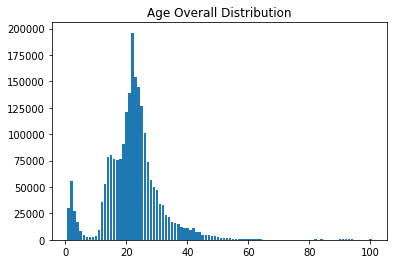

In [7]:
from collections import Counter
import matplotlib.pyplot as plt

%matplotlib inline

def age_distribution_show(age, AGE_MIN, AGE_MAX, title):
    count = Counter(age)
    count_dict = dict(count)
    axis_age = list(np.arange(AGE_MIN,AGE_MAX+1,1))
    axis_num = [count_dict[x] for x in axis_age]
    plt.figure()
    plt.bar(axis_age, axis_num)
    plt.title(title)
    plt.show()

# Age analysis
age_distribution_show(label['age'], 1, 100, 'Age Overall Distribution')

In [8]:
# Define parameters
AGE_MIN = 10  # 0-99
AGE_MAX = 80  # 0-99
LEAST_NUM_TWEET = 0

In [9]:
age = [x for x in range(AGE_MIN,AGE_MAX+1)]
label = label[label['age'].isin(age)]
label = label[label['tweet']>=LEAST_NUM_TWEET]
show_df_info(label)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059440 entries, 1 to 2320893
Data columns (total 4 columns):
uid       int64
age       int64
gender    int64
tweet     int64
dtypes: int64(4)
memory usage: 78.6 MB
None
####### Repeat ####### 
 False
####### Count ####### 
 uid       2059440
age            71
gender          2
tweet        3491
dtype: int64
####### Example ####### 
       uid  age  gender  tweet
1  100054   25       2      6
2  100065   23       1     57
3  100080   26       1     31
4  100086   26       1    129
5  100097   31       1     75


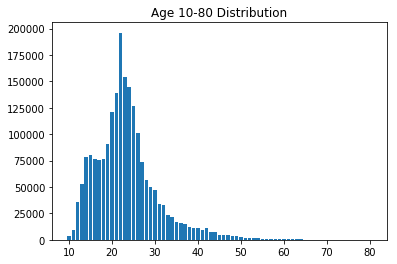

In [10]:
age_distribution_show(label['age'], 10, 80, 'Age 10-80 Distribution')

In [11]:
age2id = {}

for age in range(AGE_MIN,AGE_MAX+1):
    if age < 19:
        age2id[age] = 0
    elif age < 23: 
        age2id[age] = 1 
    elif age < 26: 
        age2id[age] = 2
    elif age < 31:
        age2id[age] = 3
    elif age < 51:
        age2id[age] = 4
    elif age < 61:
        age2id[age] = 5
    else:
        age2id[age] = 6

label[['age']] = label[['age']].applymap(lambda x:age2id[x])
show_df_info(label)
label_statics(label, label.columns[1:3])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059440 entries, 1 to 2320893
Data columns (total 4 columns):
uid       int64
age       int64
gender    int64
tweet     int64
dtypes: int64(4)
memory usage: 78.6 MB
None
####### Repeat ####### 
 False
####### Count ####### 
 uid       2059440
age             7
gender          2
tweet        3491
dtype: int64
####### Example ####### 
       uid  age  gender  tweet
1  100054    2       2      6
2  100065    2       1     57
3  100080    3       1     31
4  100086    3       1    129
5  100097    4       1     75
####### nCount #######
1    546519
0    488988
2    425407
3    328290
4    252889
5     11990
6      5357
Name: age, dtype: int64
1    1045571
2    1013869
Name: gender, dtype: int64
####### nPercent #######
1    0.265373
0    0.237437
2    0.206564
3    0.159407
4    0.122795
5    0.005822
6    0.002601
Name: age, dtype: float64
1    0.507697
2    0.492303
Name: gender, dtype: float64


## pid_cid

In [12]:
pid_cid = pd.read_csv('./item.txt', sep='\t', usecols=[0,1], header=None, names=['pid', 'cid'])
label.dropna(inplace=True)
show_df_info(pid_cid)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6095 entries, 0 to 6094
Data columns (total 2 columns):
pid    6095 non-null int64
cid    6095 non-null object
dtypes: int64(1), object(1)
memory usage: 95.3+ KB
None
####### Repeat ####### 
 False
####### Count ####### 
 pid    6095
cid     377
dtype: int64
####### Example ####### 
        pid      cid
0  2335869  8.1.4.2
1  1774844  1.8.3.6
2  1775000  1.4.2.4
3  1775024  1.4.1.4
4  1774455  1.4.1.2


In [13]:
cid2id = {num: i for i, num in enumerate(pd.unique(pid_cid['cid']))}

pid_cid[['cid']] = pid_cid[['cid']].applymap(lambda x: cid2id[x])
show_df_info(pid_cid)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6095 entries, 0 to 6094
Data columns (total 2 columns):
pid    6095 non-null int64
cid    6095 non-null int64
dtypes: int64(2)
memory usage: 95.3 KB
None
####### Repeat ####### 
 False
####### Count ####### 
 pid    6095
cid     377
dtype: int64
####### Example ####### 
        pid  cid
0  2335869    0
1  1774844    1
2  1775000    2
3  1775024    3
4  1774455    4


## uid_pid

In [14]:
uid_pid = pd.read_csv('./rec_log_train.txt', sep='\t', usecols=[0,1,2], header=None, names=['uid', 'pid', 'action'])
label.dropna(inplace=True)

uid_pid = uid_pid[uid_pid['action']==1]
uid_pid.drop('action', axis=1, inplace=True)

uid_pid = uid_pid[uid_pid['uid'].isin(label['uid'])]
uid_pid = uid_pid[uid_pid['pid'].isin(pid_cid['pid'])]

uid_pid.drop_duplicates(inplace=True)
show_df_info(uid_pid)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4665727 entries, 38 to 73209212
Data columns (total 2 columns):
uid    int64
pid    int64
dtypes: int64(2)
memory usage: 106.8 MB
None
####### Repeat ####### 
 False
####### Count ####### 
 uid    1238565
pid       4530
dtype: int64
####### Example ####### 
         uid      pid
38   633246   731434
45  2384384  1675399
46  2384384  1774963
47  2384384   682877
71  2319049   218438


In [15]:
uid_pid = pd.read_csv('./rec_log_train.txt', sep='\t', usecols=[0,1,2], header=None, names=['uid', 'pid', 'action'])
uid_pid.dropna(inplace=True)

uid_pid = uid_pid[uid_pid['action']==1]
uid_pid.drop('action', axis=1, inplace=True)

uid_pid = uid_pid[uid_pid['uid'].isin(label['uid'])]
uid_pid = uid_pid[uid_pid['pid'].isin(pid_cid['pid'])]

uid_pid.drop_duplicates(inplace=True)
show_df_info(uid_pid)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4665727 entries, 38 to 73209212
Data columns (total 2 columns):
uid    int64
pid    int64
dtypes: int64(2)
memory usage: 106.8 MB
None
####### Repeat ####### 
 False
####### Count ####### 
 uid    1238565
pid       4530
dtype: int64
####### Example ####### 
         uid      pid
38   633246   731434
45  2384384  1675399
46  2384384  1774963
47  2384384   682877
71  2319049   218438


# Filter & Process

In [16]:
def get_count(tp, id):
    playcount_groupbyid = tp[[id]].groupby(id, as_index=False)
    count = playcount_groupbyid.size()
    return count

def filter_triplets(tp, user, item, min_uc=0, max_uc=0, min_sc=0, max_sc=0):
    # Only keep the triplets for users who clicked on at least min_uc items.
    if min_uc > 0:
        usercount = get_count(tp, user)
        tp = tp[tp[user].isin(usercount.index[usercount >= min_uc])]
        
    # Only keep the triplets for users who clicked on at most max_uc items.
    if max_uc > 0:
        usercount = get_count(tp, user)
        tp = tp[tp[user].isin(usercount.index[usercount <= max_uc])]
    
    # Only keep the triplets for items which were clicked by at least min_sc users. 
    if min_sc > 0:
        itemcount = get_count(tp, item)
        tp = tp[tp[item].isin(itemcount.index[itemcount >= min_sc])]
        
    # Only keep the triplets for items which were clicked by at most max_sc users. 
    if max_sc > 0:
        itemcount = get_count(tp, item)
        tp = tp[tp[item].isin(itemcount.index[itemcount <= max_sc])]
    
    # Update both usercount and itemcount after filtering
    usercount, itemcount = get_count(tp, user), get_count(tp, item) 
    return tp, usercount, itemcount

## uid_cid

In [17]:
uid_pid_cid = pd.merge(uid_pid, pid_cid, how='inner', on='pid')
# show_df_info(uid_pid_cid)
raw_uid_cid = uid_pid_cid.drop('pid', axis=1, inplace=False)
# show_df_info(uid_cid)
raw_uid_cid.drop_duplicates(inplace=True)
show_df_info(raw_uid_cid)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3325231 entries, 0 to 4665726
Data columns (total 2 columns):
uid    int64
cid    int64
dtypes: int64(2)
memory usage: 76.1 MB
None
####### Repeat ####### 
 False
####### Count ####### 
 uid    1238565
cid        330
dtype: int64
####### Example ####### 
        uid  cid
0   633246    6
1  1463875    6
2   972940    6
3  1391785    6
4  1116208    6


### filter uid_cid (cid interactions>=2 is optional)

In [18]:
uid_cid, uid_activity, cid_popularity = filter_triplets(raw_uid_cid, 'uid', 'cid', min_uc=10, max_uc=0, min_sc=4, max_sc=0) # min_sc>=2

sparsity = 1. * uid_cid.shape[0] / (uid_activity.shape[0] * cid_popularity.shape[0])

print("After filtering, there are %d interacton events from %d users and %d items (sparsity: %.4f%%)" % 
      (uid_cid.shape[0], uid_activity.shape[0], cid_popularity.shape[0], sparsity * 100))

After filtering, there are 1143798 interacton events from 51378 users and 309 items (sparsity: 7.2047%)


In [19]:
show_df_info(uid_cid) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143798 entries, 1 to 4665724
Data columns (total 2 columns):
uid    1143798 non-null int64
cid    1143798 non-null int64
dtypes: int64(2)
memory usage: 26.2 MB
None
####### Repeat ####### 
 False
####### Count ####### 
 uid    51378
cid      309
dtype: int64
####### Example ####### 
        uid  cid
1  1463875    6
2   972940    6
3  1391785    6
5  2035240    6
6   324094    6


## uid_uid by relation

In [20]:
uid_uid = pd.read_csv('./user_sns.txt', sep='\t', usecols=[0,1], header=None, names=['uid1', 'uid2'])
uid_uid.dropna(inplace=True)
show_df_info(uid_uid)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50655143 entries, 0 to 50655142
Data columns (total 2 columns):
uid1    int64
uid2    int64
dtypes: int64(2)
memory usage: 1.1 GB
None
####### Repeat ####### 
 False
####### Count ####### 
 uid1    1892059
uid2     920110
dtype: int64
####### Example ####### 
       uid1     uid2
0  1000001   373407
1  1000001   461001
2  1000001   692475
3  1000002  1760423
4  1000002  1760426


In [21]:
unique_uid = pd.unique(uid_cid['uid']).reshape(-1,1)
self_loop = np.hstack((unique_uid, unique_uid))

uid_self_loop = pd.DataFrame(self_loop, columns=['uid1', 'uid2'])

uid_uid = uid_uid.append(uid_self_loop)
uid_uid.drop_duplicates(inplace=True)
show_df_info(uid_uid)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50706520 entries, 0 to 51377
Data columns (total 2 columns):
uid1    int64
uid2    int64
dtypes: int64(2)
memory usage: 1.1 GB
None
####### Repeat ####### 
 False
####### Count ####### 
 uid1    1898285
uid2     943836
dtype: int64
####### Example ####### 
       uid1     uid2
0  1000001   373407
1  1000001   461001
2  1000001   692475
3  1000002  1760423
4  1000002  1760426


In [22]:
uid_uid = uid_uid[uid_uid['uid1'].isin(uid_cid['uid'])]
uid_uid = uid_uid[uid_uid['uid2'].isin(uid_cid['uid'])]
show_df_info(uid_uid)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66183 entries, 2441 to 51377
Data columns (total 2 columns):
uid1    66183 non-null int64
uid2    66183 non-null int64
dtypes: int64(2)
memory usage: 1.5 MB
None
####### Repeat ####### 
 False
####### Count ####### 
 uid1    51378
uid2    51378
dtype: int64
####### Example ####### 
          uid1     uid2
2441   100008   561621
2442   100008   844869
7557  1000301  1214818
7558  1000301  1224960
7850  1000301  2066818


In [23]:
uid_uid_mirror = uid_uid.rename(columns={'uid1':'uid2', 'uid2':'uid1'}, inplace=False)
uid_uid = uid_uid.append(uid_uid_mirror)
uid_uid.drop_duplicates(inplace=True)
show_df_info(uid_uid)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77650 entries, 2441 to 50652000
Data columns (total 2 columns):
uid1    77650 non-null int64
uid2    77650 non-null int64
dtypes: int64(2)
memory usage: 1.8 MB
None
####### Repeat ####### 
 False
####### Count ####### 
 uid1    51378
uid2    51378
dtype: int64
####### Example ####### 
          uid1     uid2
2441   100008   561621
2442   100008   844869
7557  1000301  1214818
7558  1000301  1224960
7850  1000301  2066818


/home/nature/Air/pytorch-gpu/venv/lib/python3.5/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


# Map

In [24]:
user_label = label[label['uid'].isin(uid_cid['uid'])]

In [25]:
uid2id = {num: i for i, num in enumerate(user_label['uid'])}
cid2id = {num: i for i, num in enumerate(pd.unique(uid_cid['cid']))}

def col_map(df, col, num2id):
    df[[col]] = df[[col]].applymap(lambda x: num2id[x])
    return df

In [26]:
def label_map(label_df, label_list):
    for label in label_list:
        label2id = {num: i for i, num in enumerate(pd.unique(label_df[label]))}
        label_df = col_map(label_df, label, label2id)
    return label_df
    
user_label = col_map(user_label, 'uid', uid2id)
user_label = label_map(user_label, user_label.columns[1:3])
show_df_info(user_label)

/home/nature/Air/pytorch-gpu/venv/lib/python3.5/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51378 entries, 8 to 2320874
Data columns (total 4 columns):
uid       51378 non-null int64
age       51378 non-null int64
gender    51378 non-null int64
tweet     51378 non-null int64
dtypes: int64(4)
memory usage: 2.0 MB
None
####### Repeat ####### 
 False
####### Count ####### 
 uid       51378
age           7
gender        2
tweet      1596
dtype: int64
####### Example ####### 
      uid  age  gender  tweet
8      0    0       0     39
12     1    1       1    345
15     2    1       1     31
25     3    2       1     57
123    4    3       1    105


In [27]:
user_edge = uid_uid[uid_uid['uid1'].isin(uid_cid['uid'])]
user_edge = user_edge[user_edge['uid2'].isin(uid_cid['uid'])]
# show_df_info(user_edge)

user_edge = col_map(user_edge, 'uid1', uid2id)
user_edge = col_map(user_edge, 'uid2', uid2id)
show_df_info(user_edge)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77650 entries, 2441 to 50652000
Data columns (total 2 columns):
uid1    77650 non-null int64
uid2    77650 non-null int64
dtypes: int64(2)
memory usage: 1.8 MB
None
####### Repeat ####### 
 False
####### Count ####### 
 uid1    51378
uid2    51378
dtype: int64
####### Example ####### 
        uid1   uid2
2441   5204  11295
2442   5204  22120
7557  27694   7685
7558  27694  48748
7850  27694   9565


In [28]:
user_field = col_map(uid_cid, 'uid', uid2id)
user_field = col_map(user_field, 'cid', cid2id)
show_df_info(user_field)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143798 entries, 1 to 4665724
Data columns (total 2 columns):
uid    1143798 non-null int64
cid    1143798 non-null int64
dtypes: int64(2)
memory usage: 26.2 MB
None
####### Repeat ####### 
 False
####### Count ####### 
 uid    51378
cid      309
dtype: int64
####### Example ####### 
      uid  cid
1  23536    0
2  17283    0
3  28544    0
5  14523    0
6  26109    0


# Save

In [29]:
label_statics(user_label, user_label.columns[1:3])

####### nCount #######
1    13975
3    11781
0    11204
2     8051
5     5846
4      354
6      167
Name: age, dtype: int64
1    35560
0    15818
Name: gender, dtype: int64
####### nPercent #######
1    0.272004
3    0.229300
0    0.218070
2    0.156701
5    0.113784
4    0.006890
6    0.003250
Name: age, dtype: float64
1    0.692125
0    0.307875
Name: gender, dtype: float64


In [30]:
user_edge.to_csv('./input/user_edge.csv', index=False)

In [31]:
user_field.to_csv('./input/user_field.csv', index=False)

In [32]:
user_label[['uid','gender']].to_csv('./input/user_gender.csv', index=False)
user_label[['uid','age']].to_csv('./input/user_age.csv', index=False)

# Reprocess

In [33]:
import numpy as np
import pandas as pd
import scipy.sparse as sp

import time

NUM_FIELD = 10

np.random.seed(42)

def field_reader(path):
    """
    Reading the sparse field matrix stored as csv from the disk.
    :param path: Path to the csv file.
    :return field: csr matrix of field.
    """
    user_field = pd.read_csv(path)
    user_index = user_field["uid"].values.tolist()
    field_index = user_field["cid"].values.tolist()
    user_count = max(user_index)+1
    field_count = max(field_index)+1
    field_index = sp.csr_matrix((np.ones_like(user_index), (user_index, field_index)), shape=(user_count, field_count))
    return field_index

user_field = field_reader('./input/user_field.csv')

print("Shapes of user with field:", user_field.shape)
print("Number of user with field:", np.count_nonzero(np.sum(user_field, axis=1)))

def get_neighs(csr):
    neighs = []
#     t = time.time()
    idx = np.arange(csr.shape[1])
    for i in range(csr.shape[0]):
        x = csr[i, :].toarray()[0] > 0
        neighs.append(idx[x])
#         if i % (10*1000) == 0:
#             print('sec/10k:', time.time()-t)
    return neighs

def sample_neigh(neigh, num_sample):
    if len(neigh) >= num_sample:
        sample_neigh = np.random.choice(neigh, num_sample, replace=False)
    elif len(neigh) < num_sample:
        sample_neigh = np.random.choice(neigh, num_sample, replace=True)
    return sample_neigh

neighs = get_neighs(user_field)

sample_neighs = []
for i in range(len(neighs)):
    sample_neighs.append(list(sample_neigh(neighs[i], NUM_FIELD)))
sample_neighs = np.array(sample_neighs)
np.save('./input/user_field.npy', sample_neighs)
print('Shape of sampled user_field:', sample_neighs.shape)

Shapes of user with field: (51378, 309)
Number of user with field: 51378
Shape of sampled user_field: (51378, 10)


# For HGAT

In [34]:
import time
import numpy as np
import pandas as pd
import networkx as nx
import scipy.sparse as sp

In [35]:
def graph_reader(path):
    """
    Function to read the graph from the path.
    :param path: Path to the edge list.
    :return graph: NetworkX object returned.
    """
    graph = nx.from_edgelist(pd.read_csv(path).values.tolist())
    return graph

def get_neighs(csr):
    neighs = []
#     t = time.time()
    idx = np.arange(csr.shape[1])
    for i in range(csr.shape[0]):
        x = csr[i, :].toarray()[0] > 0
        neighs.append(idx[x])
#         if i % (10*1000) == 0:
#             print('sec/10k:', time.time()-t)
    return neighs

def sample_neigh(neigh, num_sample):
    if len(neigh) >= num_sample:
        sample_neigh = np.random.choice(neigh, num_sample, replace=False)
    elif len(neigh) < num_sample:
        sample_neigh = np.random.choice(neigh, num_sample, replace=True)
    return sample_neigh

def get_sample_neighs(neighs, num_sample_1, num_sample_2):
    sample_neighs = []
#     t = time.time()
    for i in range(len(neighs)):
        sample_neigh_1 = list(sample_neigh(neighs[i], num_sample_1))
        sample_neigh_2 = []
        for j in sample_neigh_1:
            neigh = neighs[j]
            sample_neigh_2.append(list(sample_neigh(neigh, num_sample_2)))
        sample_neigh_2 = np.array(sample_neigh_2).flatten().tolist()
        sample_neighs.append(sample_neigh_1 + sample_neigh_2 + [i])
#         if i % (10*1000) == 0:
#             print('sec/10k:', time.time()-t)
    return np.array(sample_neighs)

In [36]:
np.random.seed(42)

NUM_1 = 10
NUM_2 = 4

graph = graph_reader('./input/user_edge.csv')
user_adj = nx.adjacency_matrix(graph, nodelist=graph.nodes())
print(user_adj.shape)

(51378, 51378)


In [37]:
neighs = get_neighs(user_adj)
sample_neighs = get_sample_neighs(neighs, NUM_1, NUM_2)
np.save("./input/vertex_id.npy", sample_neighs)
print('shape of sample_user:', sample_neighs.shape)

shape of sample_user: (51378, 51)


In [38]:
adj_dict = {}
idx = np.arange(user_adj.shape[1])
# t = time.time()
for i in range(user_adj.shape[0]):
    x = user_adj[i, :].toarray()[0] > 0
    for j in idx[x]:
        adj_dict[(i, j)] = True
#     if i % (10*1000) == 0:
#         print('sec/10k:', time.time()-t)
print('adj_dict is completed!')

adj_dict is completed!


In [39]:
sample_user_adj = np.zeros((
    sample_neighs.shape[0], sample_neighs.shape[1], sample_neighs.shape[1]), dtype=np.float32)
# t = time.time()
for i in range(sample_neighs.shape[0]):
    for j in range(sample_neighs.shape[1]):
        for k in range(sample_neighs.shape[1]):
            if adj_dict.get((sample_neighs[i, j], sample_neighs[i, k])):
                sample_user_adj[i, j, k] = 1.
#     if i % (10*1000) == 0:
#         print('sec/10k:', time.time()-t)
np.save("./input/adjacency_matrix.npy", sample_user_adj)
print('shape of sample_user_adj:', sample_user_adj.shape)

shape of sample_user_adj: (51378, 51, 51)
